### Importing Modules for Analysis

In [53]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import pandas_datareader as DataReader
from datetime import date
import pandas_datareader.data as web
import matplotlib.figure as figure

In [2]:
nasdaq = pd.read_excel('listings.xlsx', sheetname='nasdaq',na_values='n/a')

In [3]:
market_cap = nasdaq['Market Capitalization'].div(10**6)

In [4]:
print('Mean of Market Capitalization: \n' ,market_cap.mean())
print('Median of Market Capitalization: \n' ,market_cap.median())
print('Mode of Market Capitalization: \n' ,market_cap.mode())

Mean of Market Capitalization: 
 3180.7126214953823
Median of Market Capitalization: 
 225.9684285
Mode of Market Capitalization: 
 0    0.0
dtype: float64


### Quantiles 

In [6]:
median = market_cap.quantile(.5)

In [7]:
median == market_cap.median()

True

In [17]:
# quantile in  market capitalization
quantiles = market_cap.quantile([.25,.75])
print(quantiles)

print(quantiles[.75]-quantiles[.25])

0.25     43.375930
0.75    969.905207
Name: Market Capitalization, dtype: float64
926.529277158


In [10]:
deciles = np.arange(start=.1,stop=.91,step=.1)

In [11]:
deciles

array([ 0.1,  0.2,  0.3,  0.4,  0.5,  0.6,  0.7,  0.8,  0.9])

In [13]:
market_cap.quantile(deciles)

0.1       4.884565
0.2      26.993382
0.3      65.714547
0.4     124.320644
0.5     225.968428
0.6     402.469678
0.7     723.163197
0.8    1441.071134
0.9    3671.499558
Name: Market Capitalization, dtype: float64

### Visualize quantiles with bar chart

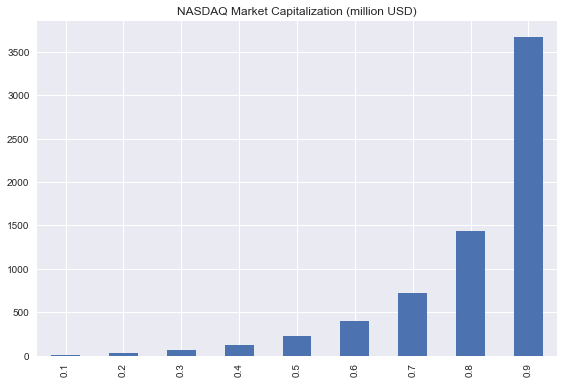

In [18]:
title = 'NASDAQ Market Capitalization (million USD)'
market_cap.quantile(deciles).plot(kind='bar',title=title)
plt.tight_layout()
plt.show()

### All statistics

In [19]:
market_cap.describe()

count      3167.000000
mean       3180.712621
std       25471.038707
min           0.000000
25%          43.375930
50%         225.968428
75%         969.905207
max      740024.467000
Name: Market Capitalization, dtype: float64

In [20]:
market_cap.describe(percentiles=np.arange(.1,.91,.1))

count      3167.000000
mean       3180.712621
std       25471.038707
min           0.000000
10%           4.884565
20%          26.993382
30.0%        65.714547
40%         124.320644
50%         225.968428
60%         402.469678
70%         723.163197
80%        1441.071134
90%        3671.499558
max      740024.467000
Name: Market Capitalization, dtype: float64

### 10 year treasury trend distribution

In [23]:
ty10 = web.DataReader('DGS10','fred',date(1962,1,1))

In [24]:
ty10.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 14893 entries, 1962-01-02 to 2019-01-31
Data columns (total 1 columns):
DGS10    14255 non-null float64
dtypes: float64(1)
memory usage: 232.7 KB


### Aggregating data by Category

Group data by sector

In [25]:
nasdaq.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3167 entries, 0 to 3166
Data columns (total 7 columns):
Stock Symbol             3167 non-null object
Company Name             3167 non-null object
Last Sale                3165 non-null float64
Market Capitalization    3167 non-null float64
IPO Year                 1386 non-null float64
Sector                   2767 non-null object
Industry                 2767 non-null object
dtypes: float64(3), object(4)
memory usage: 173.3+ KB


In [26]:
nasdaq['market_cap_m'] = nasdaq['Market Capitalization'].div(1e6)

In [27]:
nasdaq = nasdaq.drop('Market Capitalization', axis=1) # Drop column

nasdaq_by_sector = nasdaq.groupby('Sector') # create groupby onject

In [28]:
for sector, data in nasdaq_by_sector:
    print(sector, data.market_cap_m.mean())

Basic Industries 724.8999338580088
Capital Goods 1511.2373727809975
Consumer Durables 839.8026066270018
Consumer Non-Durables 3104.0512055241334
Consumer Services 5582.344174819412
Energy 826.607607854727
Finance 1044.0902047996321
Health Care 1758.709196756265
Miscellaneous 3445.655934557965
Public Utilities 2357.8653150733353
Technology 10883.43421354678
Transportation 2869.660006726413


In [29]:
# easy way

mcap_by_sector = nasdaq_by_sector.market_cap_m.mean()
print(mcap_by_sector)

Sector
Basic Industries           724.899934
Capital Goods             1511.237373
Consumer Durables          839.802607
Consumer Non-Durables     3104.051206
Consumer Services         5582.344175
Energy                     826.607608
Finance                   1044.090205
Health Care               1758.709197
Miscellaneous             3445.655935
Public Utilities          2357.865315
Technology               10883.434214
Transportation            2869.660007
Name: market_cap_m, dtype: float64


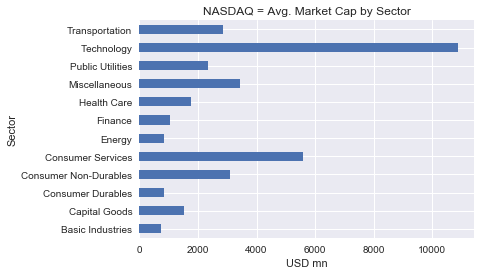

In [31]:
title = 'NASDAQ = Avg. Market Cap by Sector'
mcap_by_sector.plot(kind='barh', title=title)
plt.xlabel('USD mn')
plt.show()

### Aggregate summary for all numeric columns

In [32]:
nasdaq_by_sector.mean()

,Last Sale,IPO Year,market_cap_m
Sector,,,
Basic Industries,21.597679,2000.766667,724.899934
Capital Goods,26.188681,2001.324675,1511.237373
Consumer Durables,24.363391,2003.222222,839.802607
Consumer Non-Durables,25.749565,2000.609756,3104.051206
Consumer Services,34.917318,2004.104575,5582.344175
Energy,15.496834,2008.034483,826.607608
Finance,29.644242,2010.321101,1044.090205
Health Care,19.462531,2009.240409,1758.709197
Miscellaneous,46.094369,2004.333333,3445.655935


### Several aggregations by category

In [34]:
nasdaq_by_sector.market_cap_m.agg(['size','mean']).sort_values('size')

,size,mean
Sector,,
Transportation,52,2869.660007
Energy,66,826.607608
Public Utilities,66,2357.865315
Basic Industries,78,724.899934
Consumer Durables,88,839.802607
Miscellaneous,89,3445.655935
Consumer Non-Durables,103,3104.051206
Capital Goods,172,1511.237373
Consumer Services,348,5582.344175


### Several aggregations plus new labels

In [35]:
nasdaq_by_sector.market_cap_m.agg({'#Obs': 'size', 'Average':'mean'})

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: using a dict on a Series for aggregation
is deprecated and will be removed in a future version
  """Entry point for launching an IPython kernel.


,#Obs,Average
Sector,,
Basic Industries,78,724.899934
Capital Goods,172,1511.237373
Consumer Durables,88,839.802607
Consumer Non-Durables,103,3104.051206
Consumer Services,348,5582.344175
Energy,66,826.607608
Finance,627,1044.090205
Health Care,645,1758.709197
Miscellaneous,89,3445.655935


### Different statistics by column

In [36]:
nasdaq_by_sector.agg({'market_cap_m':'size','IPO Year':'median'})

,market_cap_m,IPO Year
Sector,,
Basic Industries,78,1996.5
Capital Goods,172,2000.0
Consumer Durables,88,2002.5
Consumer Non-Durables,103,1998.0
Consumer Services,348,2005.0
Energy,66,2011.0
Finance,627,2014.0
Health Care,645,2014.0
Miscellaneous,89,2005.0


### Aggregate by two categories

In [37]:
nasdaq_by_sector = nasdaq.groupby(['Sector','IPO Year'])

nasdaq_by_sector.market_cap_m.mean()

Sector            IPO Year
Basic Industries  1972.0        877.240005
                  1973.0       1445.697371
                  1986.0       1396.817381
                  1988.0         24.847526
                  1990.0        434.808483
                  1991.0          9.338401
                  1992.0        160.416661
                  1993.0       1933.224036
                  1994.0        163.267514
                  1995.0        125.342784
                  1996.0       4087.508427
                  1997.0         20.754774
                  2008.0        331.370813
                  2010.0        120.296167
                  2011.0         35.498729
                  2012.0        381.796074
                  2013.0         22.661533
                  2015.0        260.075564
                  2016.0         81.288336
Capital Goods     1972.0        889.230257
                  1980.0      14941.006076
                  1981.0         38.632877
                  1983.0   

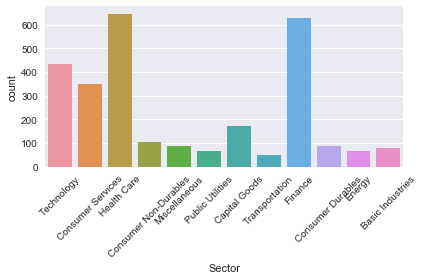

In [41]:
sns.countplot(x='Sector', data=nasdaq)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [43]:
# In the Sorted order
sector_size = nasdaq.groupby('Sector').size()
order = sector_size.sort_values(ascending=False)
order.head()

Sector
Health Care          645
Finance              627
Technology           433
Consumer Services    348
Capital Goods        172
dtype: int64

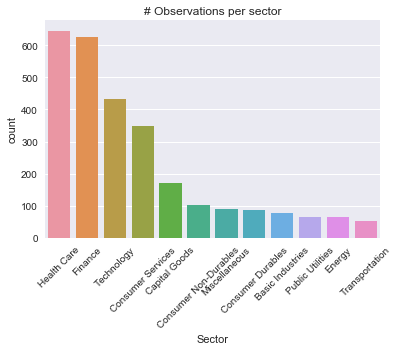

In [49]:
sns.countplot(x='Sector',data=nasdaq,order=order)
plt.xticks(rotation=45)
plt.title('# Observations per sector')
plt.show()

### countplot, multiple categories

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


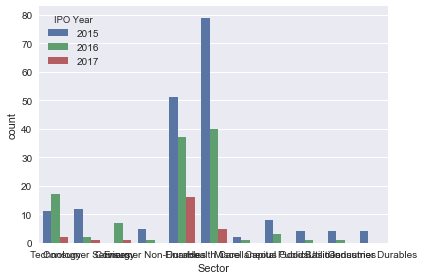

In [55]:
recent_ipos = nasdaq[nasdaq['IPO Year'] > 2014]
recent_ipos['IPO Year'] = recent_ipos['IPO Year'].astype(int)
sns.countplot(x='Sector',hue='IPO Year',data=recent_ipos)
plt.tight_layout()
plt.show()

### Compare stats with PointPlot

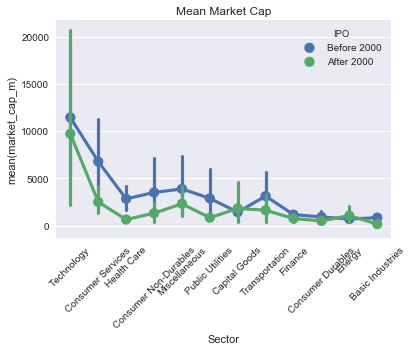

In [56]:
nasdaq['IPO'] = nasdaq['IPO Year'].apply(lambda x:
                                        'After 2000' if x > 2000 else 'Before 2000')
sns.pointplot(x='Sector',y='market_cap_m',hue='IPO',
             data= nasdaq)
plt.xticks(rotation=45)
plt.title('Mean Market Cap')
plt.show()

In [57]:
# Active companies only
nasdaq = nasdaq[nasdaq.market_cap_m > 0]

#Outlier threshold
outliers = nasdaq.market_cap_m.quantile(.9)

# Removing Outliers
nasdaq = nasdaq[nasdaq.market_cap_m < outliers]

### Boxplot: Quartiel & Outliers

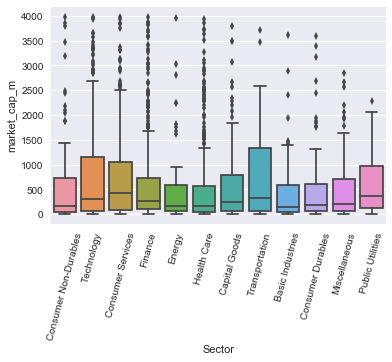

In [58]:
sns.boxplot(x='Sector',y='market_cap_m',data=nasdaq)
plt.xticks(rotation=75)
plt.show()

### A variation: SwarmPlot

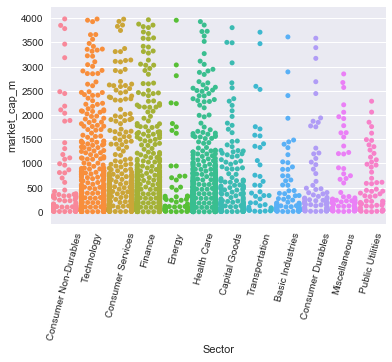

In [59]:
sns.swarmplot(x='Sector',y='market_cap_m',data=nasdaq)
plt.xticks(rotation=75)
plt.show()